# DATA620: Assignment 4

## Homework Team 3: David Simbandumwe, Eric Lehmphul and Lidiia Tronina

### Data

For this project, we will be working with a high school contact and friendship network dataset obtained from a previously completed research project on comparison between data collected using wearable sensors, contact diaries, and friendship surveys. The dataset contains information from 327 individuals who took part in the study and includes five datasets broken into the following:

* Dynamical contact list
* Directed, weighted contat network from contact diaries
* Directed unweighted friendship network from surveys
* List of pairs of students for which the existence of Facebook link is known
* Metadata

Our two primary data sources are the 'Dynamical contact list' and the 'Metadata' datasets. We are provided with nodes of students who were given an anonymous ID for privacy, the classes where each student socialized, the time of each student interaction, and the gender of the student.

### Plan for Analysis

* We will first download the necessary data files and upload them to Github. From Github, we can then use Python's Pandas package to read in the file.
* Create edge weights for each pair of student interactions over the 5 day period. We can do this by creating a frequency table that is grouped by the student IDs and then take $1/frequency$ to produce the weights.
* Assign the gender variable to each node of the graph
* Create the network of high school student's contact using networkx. An edge will represent contact between two student nodes and the weight of the edge is related to the number of times the students have interacted. Each node will have the categorical information of the student gender.
* Calculate degree centrality and eigenvector centrality for entire network.
* Subset data into two groups: Male and Female.
* Recalculae degree centrality and eigenvector centrality.
* Compare your centrality measures across the categorical groups.

### Hypothetical Outcome

We would like discover if one gender is, substantially, making more interpersonal connections than another. Theoretically, we should see that males and females are as equally as likely to connect to another individual. We may find that this in that the case in our dataset.

### Exploratory Data Analysis

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Import data
school_data = pd.read_csv('https://raw.githubusercontent.com/SaneSky109/DATA620/main/Data/High-School_data_2013.csv',
                          sep = ' ',
                         header = None,
                         names = ["Time_sec", "StudentID1", "StudentID2", "Class1", "Class2"])
attribute_data = pd.read_csv('http://www.sociopatterns.org/wp-content/uploads/2015/09/metadata_2013.txt',
                   sep = '\t',
                   header = None,
                   names = ["studentID", "Class", "Gender"])

In [3]:
school_data.head(10)

Time_sec  StudentID1  StudentID2 Class1 Class2
0  1385982020         454         640     MP     MP
1  1385982020           1         939  2BIO3  2BIO3
2  1385982020         185         258    PC*    PC*
3  1385982020          55         170  2BIO3  2BIO3
4  1385982020           9         453     PC     PC
5  1385982020           9          45     PC     PC
6  1385982020          14         190    PC*    PC*
7  1385982020         400         637  2BIO1  2BIO1
8  1385982020         255         275  2BIO3  2BIO3
9  1385982020         176         533    PC*    PC*

In [4]:
attribute_data.head(10)

studentID  Class Gender
0        650  2BIO1      F
1        498  2BIO1      F
2        627  2BIO1      F
3        857  2BIO1      F
4        487  2BIO1      F
5         28  2BIO2      M
6        927  2BIO1      F
7         72  2BIO1      F
8        400  2BIO1      F
9        945  2BIO1      F

As can be seen from the tables above, the dataset has a wide variety of numeric and categorical data. We’ll dive deeper into this data now.

The first dataset gives the contacts of the students of nine classes during 5 days, as measured by the SocioPatterns infrastructure. It shows the active contacts during 20-second intervals of the data collection.

The second dataset contains a list in which each line gives class and gender of the student.

In [5]:
# Randomly assign 'Gender' to unknown students
attribute_data.index[attribute_data['Gender'] == "Unknown"].tolist()

attribute_data.loc[320,'Gender'] = "F"
attribute_data.loc[321,'Gender'] = "M"
attribute_data.loc[322,'Gender'] = "F"
attribute_data.loc[323,'Gender'] = "F"
attribute_data.loc[324,'Gender'] = "M"
attribute_data.loc[325,'Gender'] = "M"
attribute_data.loc[326,'Gender'] = "M"

In [6]:
# Create Weights. Students can contact eachother multiple times in a class. Weights can capture how often the students communicate.
weighted_data = school_data.groupby(['StudentID1', 'StudentID2']).size().reset_index(name="Contacts")

# Create weights using 1/contacts to have people who are more social with eachother closer than people who hardly socialize with eachother
weighted_data["Weighted_Distance"] = 1 / weighted_data["Contacts"]

weighted_data.head(35)

StudentID1  StudentID2  Contacts  Weighted_Distance
0            1          55         8           0.125000
1            1          63         2           0.500000
2            1         101         1           1.000000
3            1         106         4           0.250000
4            1         117        18           0.055556
5            1         170         8           0.125000
6            1         179         1           1.000000
7            1         196        38           0.026316
8            1         199         2           0.500000
9            1         202         1           1.000000
10           1         205        47           0.021277
11           1         252         5           0.200000
12           1         364         2           0.500000
13           1         494       123           0.008130
14           1         640         1           1.000000
15           1         653         1           1.000000
16           1         778        10           0.100000
17           1         779         1           1.000000
18           1         871         2           0.500000
19           1         883         2           0.500000
20           1         894         3           0.333333
21           1         939        85           0.011765
22           1        1201         1           1.000000
23           3          27         2           0.500000
24           3          28        27           0.037037
25           3          46        10           0.100000
26           3          58         1           1.000000
27           3          61         7           0.142857
28           3          63         2           0.500000
29           3          65         1           1.000000
30           3         106         7           0.142857
31           3         132         1           1.000000
32           3         147      1682           0.000595
33           3         156         1           1.000000
34           3         160         9           0.111111

In [7]:
# Add edges and weights to Graph object
G = nx.Graph()
for i in weighted_data.index:
    G.add_edge(weighted_data.iat[i,0],
               weighted_data.iat[i,1], 
               weight = weighted_data.iat[i,3])
    

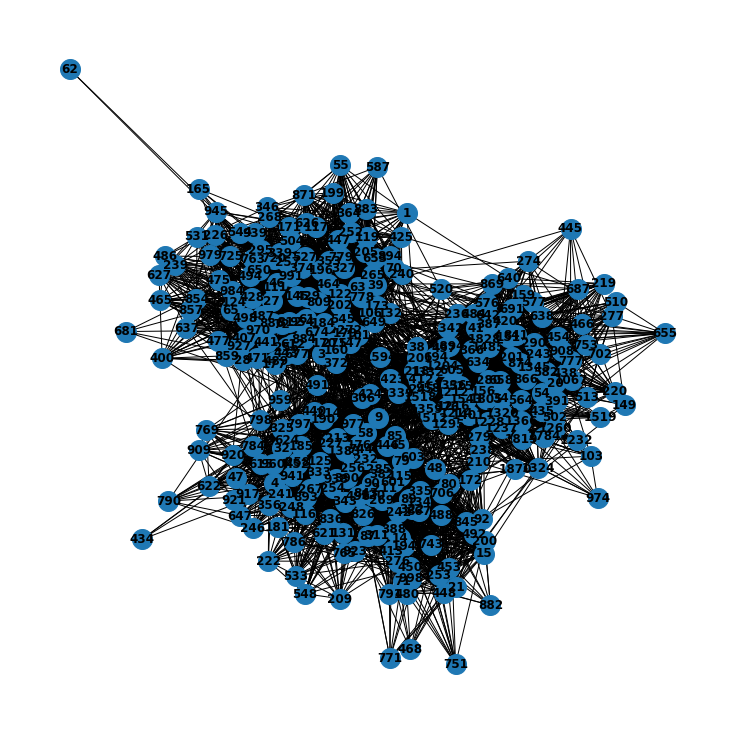

In [8]:
plt.figure(figsize = (10,10))
nx.draw(G, with_labels = True, node_size = 400, font_color = 'black', font_weight = 'bold')